# The Beta-Binomial Bayesian Model

Every four years, Catalans go to the polls to cast their vote for President de la Generalitat. Consider the following scenario. “Elon” has
decided to run for president and you're his campaign manager for the province of Girona. As such, you've conducted 30 different polls throughout the election season. Though Elon's support has hovered around 45%, he polled at around 35% in the dreariest days and around 55% in the best days on the campaign trail (see poll's results figure).

Elections are dynamic, thus Elon's support is always in flux. Yet these past polls provide prior information about π, the proportion of
Girona that currently support Elon. In fact, we can reorganize this information into a formal prior probability model of π. We worked a similar example in your Homework, in which context π was Kasparov's probability of beating Deep Blue at chess.

### Goals 
- **Utilize and tune continuous priors**. You will learn how to interpret and tune a continuous Beta prior model to reflect your prior information about π.
- **Interpret and communicate features of prior and posterior models** by using properties such as mean, mode, and variance.
- **Construct the fundamental Beta-Binomial model** for proportion π.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import binom
from empiricaldist import Pmf

import utils as ut

### Poll's results

Text(0.5, 1.0, 'Histogram of Poll Results')

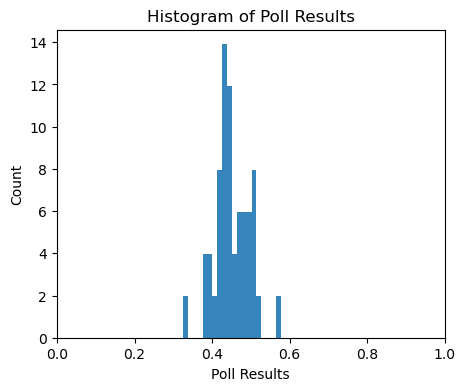

In [46]:
#poll results
sample = ut.get_poll_results(40)

plt.figure(figsize=(5, 4))
plt.hist(sample,bins=20, density=True, alpha=0.9)
plt.xlim([0,1])
plt.xlabel("Poll Results")
plt.ylabel("Count")
plt.title("Histogram of Poll Results")


We can better capture the reality of Elon’s support as a continuous probability between 0 and 1 and conduct a more refined Bayesian analysis by modeling π with a continuous prior probability distribution.

## 3.1 The Beta Prior Model

We begin by modeling the prior probability distribution for Elon's election support π. This is represented by a Beta distribution, which is a flexible continuous model for proportions. The Beta distribution has two shape parameters, α and β, which define its shape.

The probability density function (pdf) of a Beta distribution is:

$$ f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \pi^{\alpha - 1} (1 - \pi)^{\beta - 1}, \quad \pi \in [0,1] $$

where  $\Gamma(z) = \int_0^\infty x^{z-1}e^{-y}\;dx$ and $\Gamma(z+1)=z\Gamma(z)$ is the Gamma function, which generalizes the factorial function.

### Beta Distribution Properties

The mean and mode of a Beta(α, β) distribution are given by:

$$ E(\pi) = \frac{\alpha}{\alpha + \beta} $$

$$ \text{Mode}(\pi) = \frac{\alpha - 1}{\alpha + \beta - 2}, \quad \text{if } \alpha, \beta > 1 $$

$$ \text{Var}(\pi) = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.$$

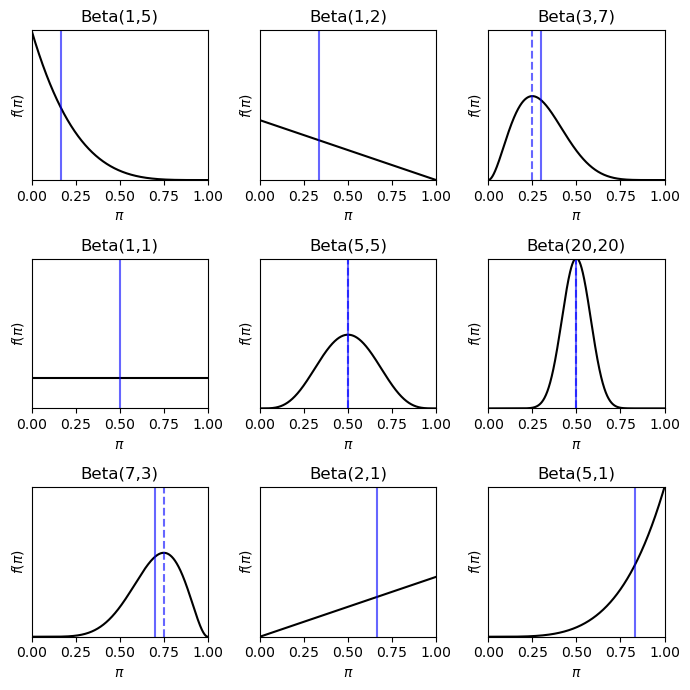

In [3]:
ut.get_gamma_plots()

With a sense for how the Beta(α, β) model works, let's tune the shape hyperparameters α and β to reflect our prior information about Elon's election support π. Elon's average support was around 45 percentage points, though he roughly polled as low as 25 and as high as 65 percentage points. Our Beta(α, β) prior should have similar patterns. For example, we want to pick α and β for which π tends to be around 0.45, E(π) = α/(α + β) ≈ 0.45. Or, after some rearranging,

$$\alpha \approx \frac{9}{11}\beta$$

We finally decide to use $\alpha = 45, \; \beta = 55$, so 
$$E(\pi)=0.450$$  $$Mode(\pi)=0.4490$$

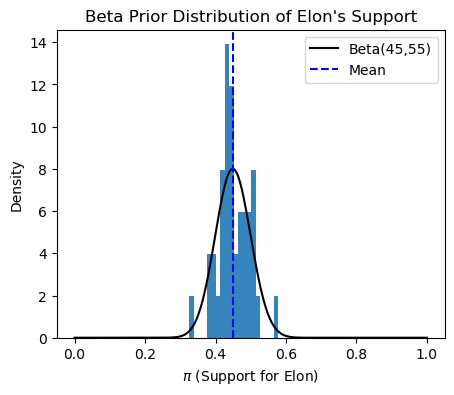

In [47]:
# Generate x values
alpha=45
beta_param = 55

x = np.linspace(0, 1, 1000)
y = beta.pdf(x, alpha, beta_param)

# Plot the Beta distribution
plt.figure(figsize=(5, 4))
plt.plot(x, y, label=f'Beta({alpha},{beta_param})', color='black')
plt.hist(sample,bins=20, density=True, alpha=0.9)
plt.axvline(alpha / (alpha + beta_param), color='blue', linestyle='--', label='Mean')
plt.xlabel('$\pi$ (Support for Elon)')
plt.ylabel('Density')
plt.title('Beta Prior Distribution of Elon\'s Support')
plt.legend()
plt.show()

In the second step of our Bayesian analysis of Elon's election support π, you're ready to collect some data.

## 3.2 The Binomial Data Model & Likelihood Function

We now incorporate polling data. The results depend upon, and thus will provide insight into, π – the greater Elon's actual support, the greater Y will tend to be. To model the dependence of Y on π, we can make the following assumptions about the poll: 1) voters answer the poll independently of one another; and 2) the probability that any polled voter supports your candidate Elon is π. We model this with a Binomial distribution:

$$ Y | \pi \sim \text{Bin}(n, \pi) $$

The Binomial probability mass function (pmf) is given by:

$$ P(Y = y | \pi) = \binom{n}{y} \pi^y (1 - \pi)^{n - y} $$

The results of the new poll of **n = 50** voters, recorded **Y = 30** as supporters of Elon.

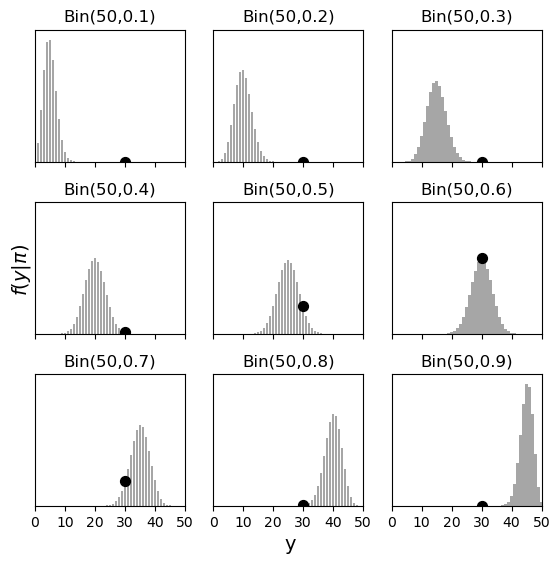

In [60]:
# Define parameters for Binomial distributions
n = 50  # Number of trials
pi_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Probabilities

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(5.5, 5.5), sharex=True, sharey=True)

# Generate and plot Binomial distributions
y_values = np.arange(0, n+1)  # Possible values of y
obs_y = 30  # Observed value to highlight

for ax, pi in zip(axes.flatten(), pi_values):
    pmf_values = binom.pmf(y_values, n, pi)
    
    # Plot histogram of Binomial distribution
    ax.bar(y_values, pmf_values, color='gray', alpha=0.7)
    
    # Highlight observed data point
    ax.scatter(obs_y, binom.pmf(obs_y, n, pi), color='black', s=50, label="Observed Y")

    # Formatting
    ax.set_title(f'Bin({n},{pi})', fontsize=12)
    ax.set_xlim(0, n)
    ax.set_ylim(0, 0.2)
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.set_yticks([])

# Labels
fig.text(0.5, -0.01, 'y', ha='center', fontsize=14)
fig.text(-0.01, 0.5, '$f(y|\pi)$', va='center', rotation='vertical', fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()


In reality, we ultimately observe that the poll was a huge success: Y = 30 of n = 50 (60%) polled voters support Elon! This result is highlighted by the black dots among the pmfs inprevious figure. Next figure represents the likelihoods of the observed polling data, Y = 30, at each potential level of Elon's support π in {0.1, 0.2,…, 0.9}. In fact, this discrete set of scenarios represents a small handful of points along the complete continuous likelihood function L(π|y = 30)=P(y = 30|π) defined for any π between 0 and 1 (black curve).

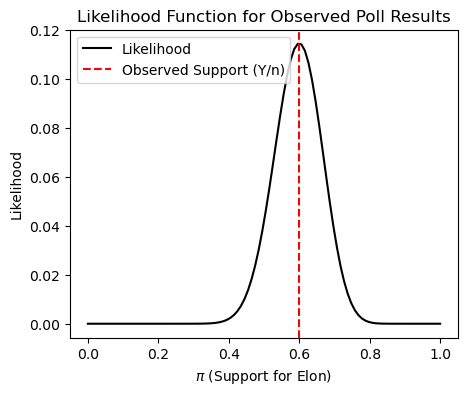

In [61]:
from scipy.stats import binom

# Define Binomial parameters
n, y_obs = 50, 30

# Generate likelihood for different pi values
pi_vals = np.linspace(0, 1, 100)
likelihood_vals = binom.pmf(y_obs, n, pi_vals)

# Plot the likelihood function
plt.figure(figsize=(5, 4))
plt.plot(pi_vals, likelihood_vals, color='black', label='Likelihood')
plt.xlabel('$\pi$ (Support for Elon)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for Observed Poll Results')
plt.axvline(y_obs/n, color='red', linestyle='--', label='Observed Support (Y/n)')
plt.legend()
plt.show()

## 3.3 The Beta Posterior Model
We now have two pieces of our Bayesian model in place – the Beta prior model for Elon's support ($\pi$) and the Binomial model for the dependence of polling data ($Y$) on ($\pi$). The Bayesian model is defined as:

$$ \pi \sim \text{Beta}(\alpha=45,\beta=55)\;\; \text{(Prior)} $$
$$ Y | \pi \sim \text{Bin}(n=50, \pi)\;\; \text{(Likelihood)} $$



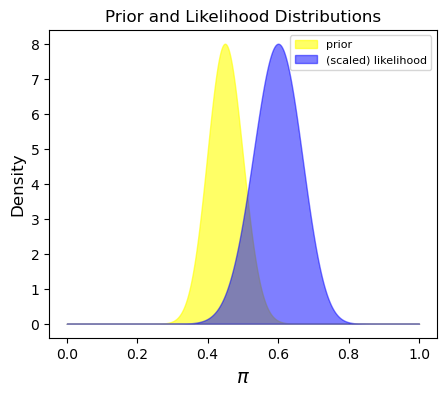

In [62]:
# Define Beta prior parameters
alpha_prior, beta_prior = 45, 55

# Define Binomial data (likelihood)
n, y_obs = 50, 30

# Define range for π values
x = np.linspace(0, 1, 1000)

# Compute densities
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
likelihood_pdf = binom.pmf(y_obs, n, x)  # Likelihood function
likelihood_pdf = likelihood_pdf / likelihood_pdf.max() * prior_pdf.max()  # Scale likelihood for visualization

# Create plot
plt.figure(figsize=(5, 4))
plt.fill_between(x, prior_pdf, color="yellow", alpha=0.6, label="prior")
plt.fill_between(x, likelihood_pdf, color="blue", alpha=0.5, label="(scaled) likelihood")

# Labels and legend
plt.xlabel(r"$\pi$", fontsize=14)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=8)
plt.title("Prior and Likelihood Distributions")

# Show plot
plt.show()

Applying Bayes' Rule, we update our prior based on the likelihood from the new data:

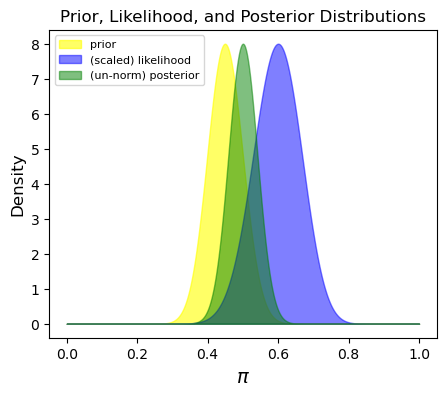

In [64]:
# Define Beta prior parameters
alpha_prior, beta_prior = 45, 55

# Define Binomial data (likelihood)
n, y_obs = 50, 30

# Define range for π values
x = np.linspace(0, 1, 1000)

# Compute densities
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
likelihood_pdf = binom.pmf(y_obs, n, x)  # Likelihood function
posterior_pdf = Pmf(prior_pdf*likelihood_pdf)
posterior_pdf.normalize()

# Scale likelihood for visualization
likelihood_pdf = likelihood_pdf / likelihood_pdf.max() * prior_pdf.max()  





# Create plot
plt.figure(figsize=(5, 4))
plt.fill_between(x, prior_pdf, color="yellow", alpha=0.6, label="prior")
plt.fill_between(x, likelihood_pdf, color="blue", alpha=0.5, label="(scaled) likelihood")
plt.fill_between(x, posterior_pdf/posterior_pdf.max()*prior_pdf.max(), color="green", alpha=0.5, label="(un-norm) posterior")

# Labels and legend
plt.xlabel(r"$\pi$", fontsize=14)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=8)
plt.title("Prior, Likelihood, and Posterior Distributions")

# Show plot
plt.show()

You might also recognize something new: **like the prior, the posterior model of π is continuous and lives on $[0,1]$**. That is, like the prior, **the posterior appears to be a Beta(α, β) model** where the shape parameters have been updated to combine information from the prior and data. This is indeed the case.

$$ \pi | (Y = 30) \sim \text{Beta}(\alpha + Y, \beta + n - Y) $$

Thus, our posterior model is:

$$ \pi | (Y = 30) \sim \text{Beta}(75, 75) $$

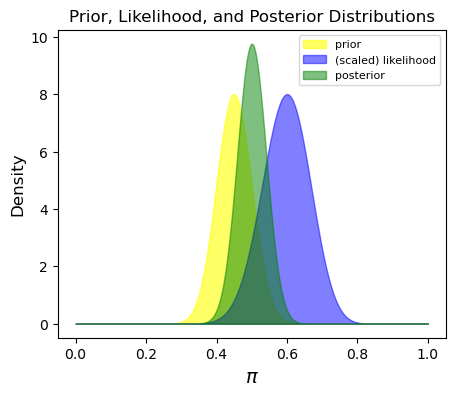

In [66]:
# Define Beta prior parameters
alpha_prior, beta_prior = 45, 55

# Define Binomial data (likelihood)
n, y_obs = 50, 30

# Define Beta posterior parameters
alpha_post = alpha_prior + y_obs
beta_post = beta_prior + (n - y_obs)

# Define range for π values
x = np.linspace(0, 1, 1000)

# Compute densities
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
likelihood_pdf = binom.pmf(y_obs, n, x)  # Likelihood function
likelihood_pdf = likelihood_pdf / likelihood_pdf.max() * prior_pdf.max()  # Scale likelihood for visualization
posterior_pdf = beta.pdf(x, alpha_post, beta_post)

# Create plot
plt.figure(figsize=(5, 4))
plt.fill_between(x, prior_pdf, color="yellow", alpha=0.6, label="prior")
plt.fill_between(x, likelihood_pdf, color="blue", alpha=0.5, label="(scaled) likelihood")
plt.fill_between(x, posterior_pdf, color="green", alpha=0.5, label="posterior")

# Labels and legend
plt.xlabel(r"$\pi$", fontsize=14)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize = 8)
plt.title("Prior, Likelihood, and Posterior Distributions")

# Show plot
plt.show()


Importantly, notice that the posterior follows a different parameterization of the same probability model as the prior – both **the prior and posterior are Beta models with different tunings**. In this case, we say that the **Beta(α, β) model is a conjugate prior for the corresponding Bin(n, π) data model**. Our work below will highlight that conjugacy simplifies the construction of the posterior, and thus can be a desirable property in Bayesian modeling.


<div style="background-color:#d4edda; padding:10px; border:5px solid #155724;">
    
## Conjugate prior

### We say that f(π) is a conjugate prior for L(π|y) if the posterior, f(π|y) ∝ f(π)·L(π|y), is from the same model family as the prior.

</div>

### Some theory... sorry for that!

The posterior construction for the general Beta-Binomial model is very similar to that of the election-specific model. First, the Beta prior pdf $f(\pi)$ and the likelihood function $L(\pi \mid y)$, the conditional pmf of the $\operatorname{Bin}(n, \pi)$ model upon observing data $Y=y$. For $\pi \in[0,1]$,
$$
f(\pi)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \pi^{\alpha-1}(1-\pi)^{\beta-1} \text { and } L(\pi \mid y)=\binom{n}{y} \pi^y(1-\pi)^{n-y}
$$

Putting these two pieces together, the posterior pdf follows from Bayes' Rule:
$$
\begin{aligned}
f(\pi \mid y) & \propto f(\pi) L(\pi \mid y) \\
& =\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \pi^{\alpha-1}(1-\pi)^{\beta-1} \cdot\binom{n}{y} \pi^y(1-\pi)^{n-y} \\
& \propto \pi^{(\alpha+y)-1}(1-\pi)^{(\beta+n-y)-1}\\
&\sim \text{Beta}(\alpha + Y, \beta + n - Y)
\end{aligned}
$$

## 3.5 Simulating the Beta-Binomial

To further understand our Bayesian model, we simulate 10,000 samples from the posterior distribution.

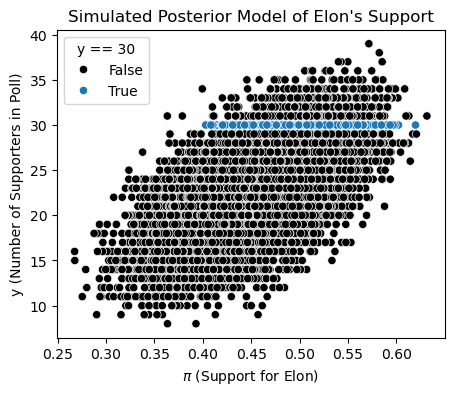

In [73]:
import pandas as pd
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)
alpha = 45
beta_param = 55
size=20000

# Simulate 10,000 values of π from Beta(45,55)
pi_values = np.random.beta(alpha, beta_param, size)

# Simulate potential poll result Y from Binomial(50, π)
y_values = np.random.binomial(n=50, p=pi_values, size=size)

# Store in a dataframe
data = pd.DataFrame({'pi': pi_values, 'y': y_values})

# Create scatter plot
plt.figure(figsize=(5, 4))
sns.scatterplot(data=data, x='pi', y='y', hue=(data['y'] == 30), legend=True, palette={False: "black", True: "tab:blue"})

# Labels and title
plt.xlabel(r'$\pi$ (Support for Elon)')
plt.ylabel('y (Number of Supporters in Poll)')
plt.title('Simulated Posterior Model of Elon\'s Support')
plt.legend(title='y == 30')

# Show plot
plt.show()


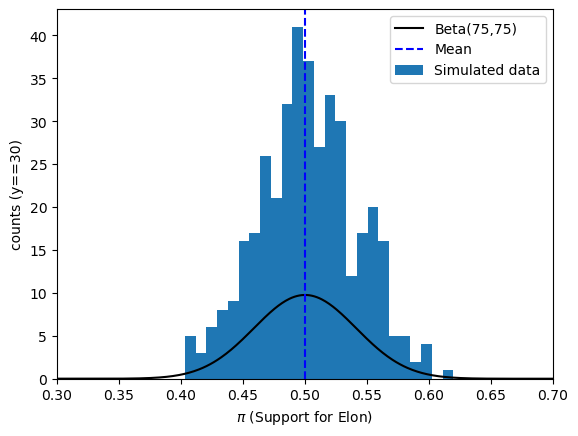

In [74]:
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 75, 75)
plt.plot(x,y, color='black', label=r'Beta(75,75)')
plt.axvline(0.5, color='blue', linestyle='--', label='Mean')

plt.hist(np.asarray(data[data['y'] == 30]['pi']), bins=25, color='tab:blue', label = 'Simulated data')
plt.xlabel(r'$\pi$ (Support for Elon)')
plt.ylabel('counts (y==30)')
plt.xlim([0.3,0.7])
plt.legend()

## Summary

You built the foundational Beta-Binomial model for ($\pi$), an **unknown proportion that can take any value between 0 and 1**:

$$
Y | \pi \sim \text{Bin}(n, \pi) \quad \text{and} \quad \pi \sim \text{Beta}(\alpha, \beta) \Longrightarrow \pi \mid (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y).
$$

This model reflects the four pieces common to every Bayesian analysis:

1. **Prior model** The Beta prior model for $(\pi)$ can be tuned to reflect the relative prior plausibility of each $(\pi \in [0,1])$.
   
   $$
   f(\pi) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \pi^{\alpha-1}(1 - \pi)^{\beta-1}.
   $$

2. **Data model** To learn about $(\pi)$, we collect **data** $(Y)$, the number of successes in $(n)$ independent trials, each having probability of success $(\pi)$. The dependence of $(Y)$ on $(\pi)$ is summarized by the Binomial model $(\text{Bin}(n, \pi))$.

3. **Likelihood function** Upon observing data $(Y = y)$ where $(y \in \{0,1,\dots,n\})$, the likelihood function of $(\pi)$, obtained by plugging $(y)$ into the Binomial pmf, provides a mechanism by which to compare the compatibility of the data with different $(\pi)$.
   
   $$
   L(\pi \mid y) = \binom{n}{y} \pi^y (1 - \pi)^{n - y} \quad \text{for } \pi \in [0,1].
   $$

4. **Posterior model** Via Bayes' Rule, the **conjugate** Beta prior combined with the Binomial data model produce a Beta posterior model for $(\pi)$. The updated Beta posterior parameters $(\alpha + y, \beta + n - y)$ reflect the influence of the prior (via $\alpha$ and $\beta$) and the observed data (via y and n).
   
   $$
   f(\pi \mid y) \propto f(\pi) L(\pi \mid y) \propto \pi^{(\alpha + y) - 1}(1 - \pi)^{(\beta + n - y) - 1}.
   $$



# Exercises

**Exercise 1.** (Tune your Beta prior: Take I). In each situation below, tune a Beta(α, β) model that accurately reáects the given prior information. In
many cases, there's no single “right” answer, but rather multiple “reasonable” answers.

a) Your friend applied to a job and tells you: “I think I have a 40% chance of getting the job, but I'm pretty unsure.” When pressed further, they put their chances between 20% and 60%.

b) A scientist has created a new test for a rare disease. They expect that the test is accurate 80% of the time with a variance of 0.05.

c) Your Aunt Jo is a successful mushroom hunter. She boasts: “I expect to ànd enough mushrooms to feed myself and my coworkers at the auto-repair shop 90% of the time, but if I had to give you a likely range it would be between 85% and 100% of the time.”

d) Sal just interviewed for a job, and doesn't know how to describe their chances of getting an offer. They say, “I couldn't read my interviewer's expression! I either really impressed them and they are absolutely going to hire me, or I made a terrible impression and they are burning my resumé as
we speak.”

**Exercise 2.** (Regular bike ridership). A university wants to know what proportion of students are regular bike riders, π, so that they can install an
appropriate number of bike racks. Since the university is in sunny Barcelona, staff think that π has a mean of 1 in 4 students, and a mode of 5/22.

a) Specify and plot a Beta model that reáects the staff's prior ideas about π.

b) Among 50 surveyed students, 15 are regular bike riders. What is the posterior model for π?

c) What is the mean, mode, and standard deviation of the posterior model?

d) Does the posterior model more closely reáect the prior information or the data? Explain your reasoning.

**Exercise 3.** Reapply the conjugate prior theory to revisit and solve the Euro problem from session 03.

**Exercise 4.** Apply the conjugate prior theory to rework your homework, incorporating simulations to support your analysis.